In [2]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb

In [56]:
g_band = fits.open('./data/frame-g-008162-6-0100.fits', ext=0)
wcs = WCS(g_band[0].header)

print(wcs)

coord = SkyCoord(g_band[0].header['CRVAL1'], g_band[0].header['CRVAL2'], unit='deg')

g_band.writeto('./data_test/frame-g-008162-6-0100.fits',overwrite=True)


i_band = fits.open('./data/frame-i-008162-6-0100.fits', ext=0)
coord = SkyCoord(i_band[0].header['CRVAL1'], i_band[0].header['CRVAL2'], unit='deg')

x,y = wcs.world_to_pixel(coord)

shift_x = int(x[()] - i_band[0].header['CRPIX1'])

shift_y = int(y[()] - i_band[0].header['CRPIX2'])


print(shift_x,shift_y)

data = i_band[0].data

print(data[0,0])

data = np.roll(data, (shift_x,shift_y),axis=(1,0))

print(data[0,0])


i_band[0].data = data

i_band.writeto('./data_test/frame-i-008162-6-0100.fits',overwrite=True)

i_band.close()



r_band = fits.open('./data/frame-r-008162-6-0100.fits', ext=0)
coord = SkyCoord(r_band[0].header['CRVAL1'], r_band[0].header['CRVAL2'], unit='deg')

x,y = wcs.world_to_pixel(coord)

shift_x = int(x[()] - r_band[0].header['CRPIX1'])

shift_y = int(y[()] - r_band[0].header['CRPIX2'])


print(shift_x,shift_y)

data = r_band[0].data

print(data[0,0])

data = np.roll(data, (shift_x,shift_y),axis=(1,0))

print(data[0,0])

r_band[0].data = data

r_band.writeto('./data_test/frame-r-008162-6-0100.fits',overwrite=True)

r_band.close()


g_band.close()


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 334.960318689  27.7478847053  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : -2.75239507779e-05  0.000106470414924  
CD2_1 CD2_2  : 0.00010645348293  2.75206701776e-05  
NAXIS : 2048  1489
0 8
0.08691406
-0.072631836
1 11
0.02633667
-0.00063610077


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


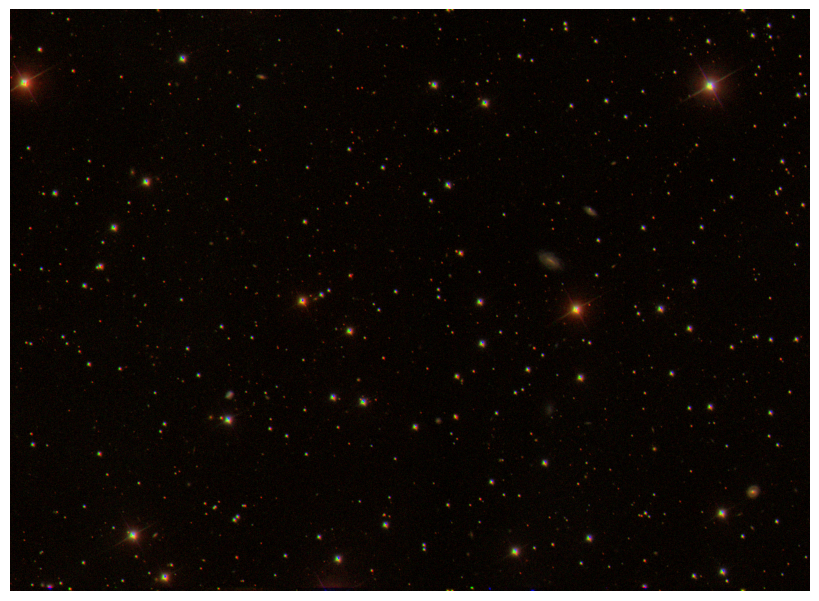

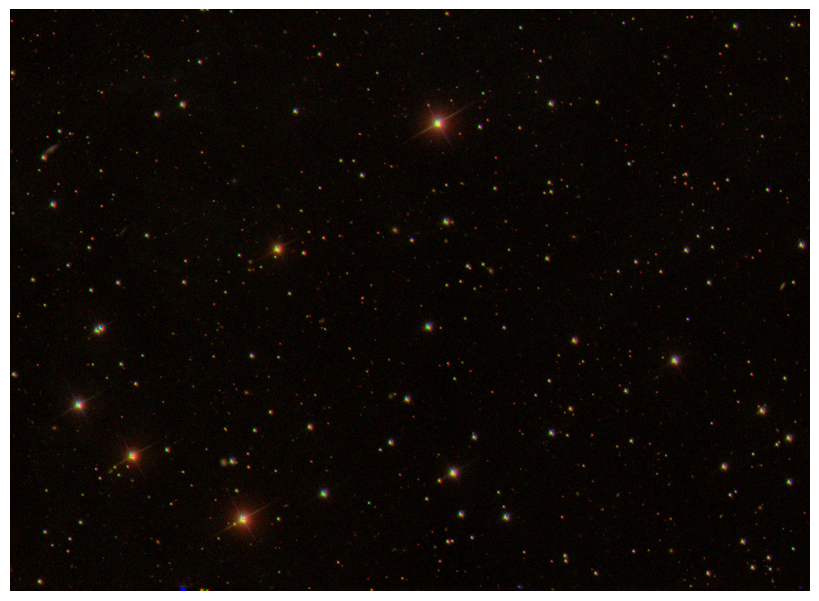

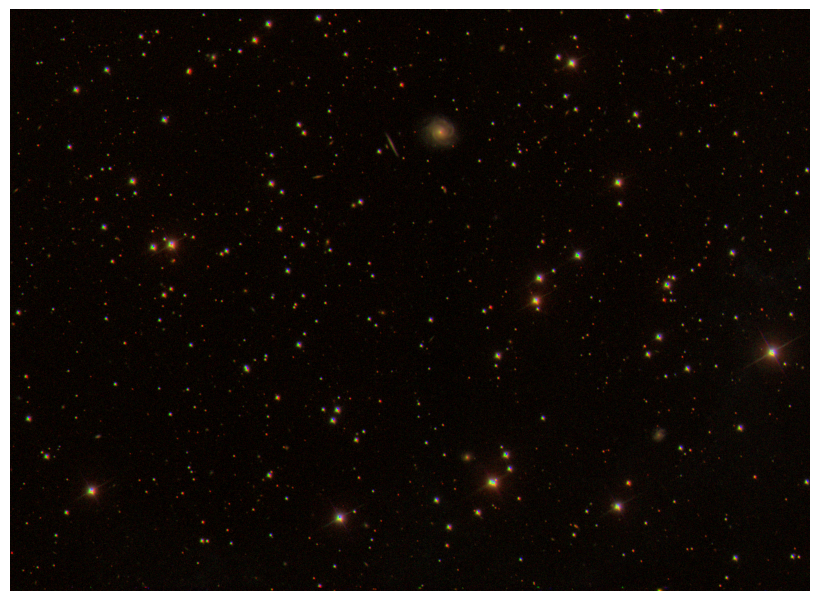

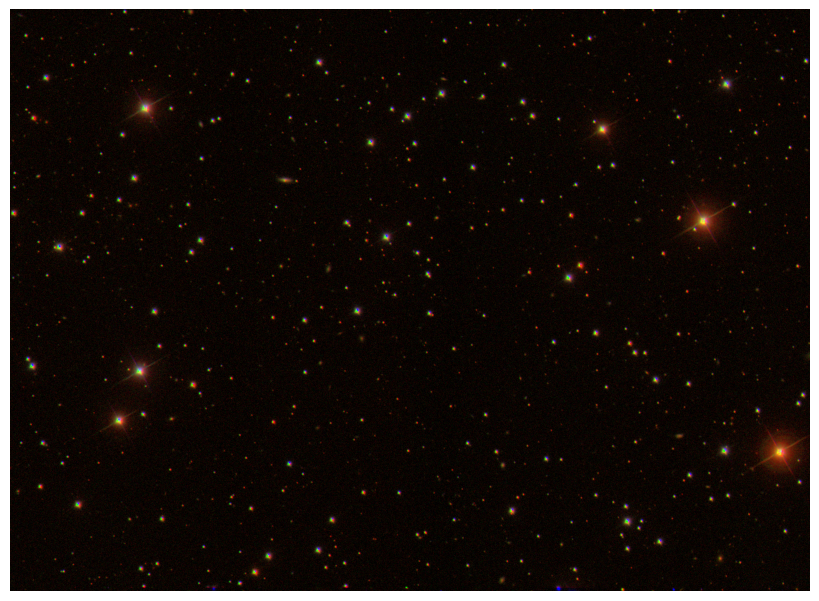

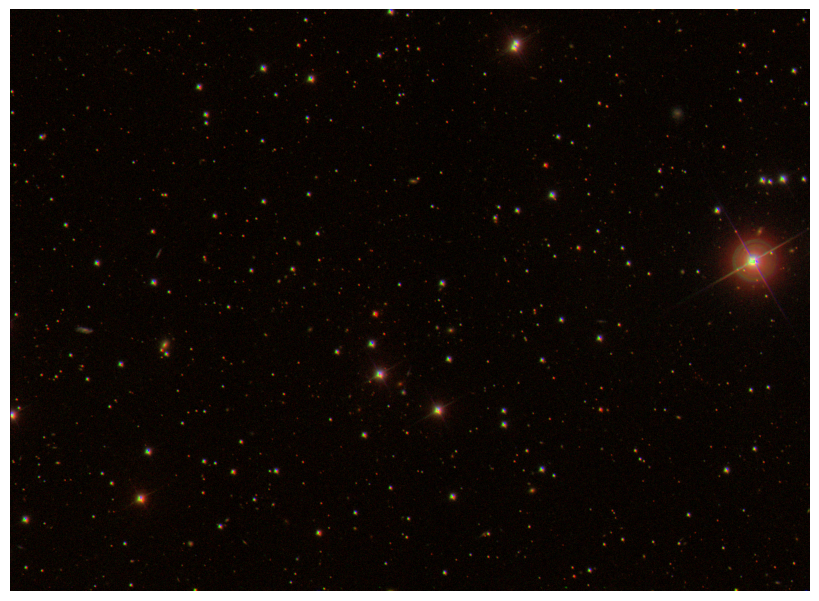

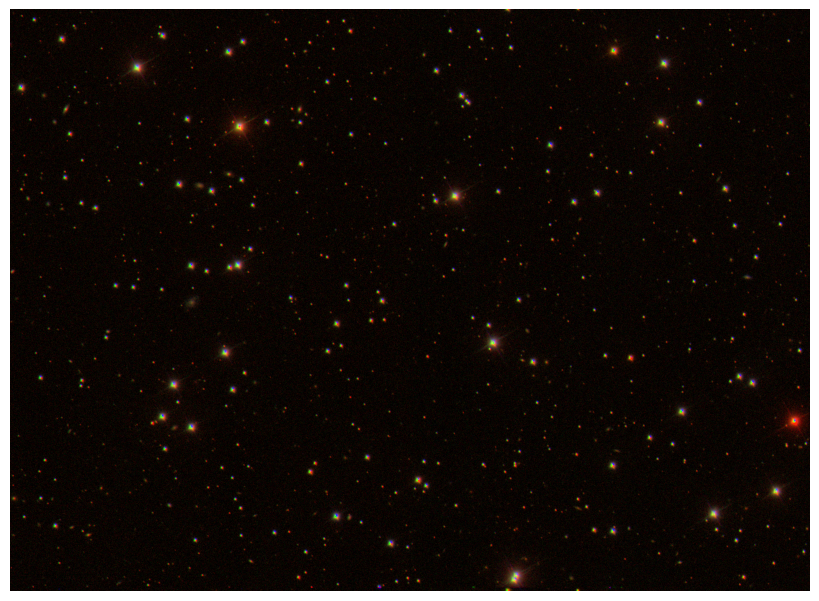

In [66]:
# Read in the three images downloaded from here:

for index in range(100, 105 + 1):
    g_name = fits.open(f'./data_test/frame-g-008162-6-0{index:03d}.fits', ext=0)
    r_name = fits.open(f'./data_test/frame-r-008162-6-0{index:03d}.fits', ext=0)
    i_name = fits.open(f'./data_test/frame-i-008162-6-0{index:03d}.fits', ext=0)

    wcs = WCS(r_name[0].header)

    g = g_name[0].data
    r = r_name[0].data
    i = i_name[0].data

    filename = f"data_test/{index}.jpg"

    rgb_default = make_lupton_rgb(i, r, g, Q=10, stretch=0.5, filename=filename)
    plt.figure()
    plt.axis("off")
    plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0, wspace=0.0, hspace=0.0)
    plt.imshow(rgb_default, origin='lower')

In [49]:
def create_tensor(start_index, end_index, ref_band="g"):
    bands = ["g", "r", "i", "u", "z"]

    data = []

    for i in range(start_index, end_index + 1):
        channels = []
        ref_band_img = fits.open(
            f"./data/frame-{ref_band}-008162-6-0{i:03d}.fits", ext=0
        )

        channels.append(ref_band_img[0].data)

        wcs = WCS(ref_band_img[0].header)
        coord = SkyCoord(
            ref_band_img[0].header["CRVAL1"],
            ref_band_img[0].header["CRVAL2"],
            unit="deg",
        )

        for band in bands:
            if(band == ref_band):
                continue

            band_img = fits.open(f"./data/frame-{band}-008162-6-0{i:03d}.fits", ext=0)

            coord = SkyCoord(
                band_img[0].header["CRVAL1"], band_img[0].header["CRVAL2"], unit="deg"
            )
            x, y = wcs.world_to_pixel(coord)
            shift_x = int(x[()] - band_img[0].header["CRPIX1"])
            shift_y = int(y[()] - band_img[0].header["CRPIX2"])

            band_img[0].data = np.roll(band_img[0].data, (shift_x, shift_y), axis=(1, 0))
            channels.append(band_img[0].data)

            band_img.close()

        data.append(np.stack(channels,axis=2))


    return np.stack(data,axis=0)


data = create_tensor(100,101)

np.save('tensor.npy',data)

In [51]:
data_new = np.load('tensor.npy')
data_new.shape

(2, 1489, 2048, 5)